In [1]:
import altair as alt
import pandas as pd
import requests

import json

alt.renderers.enable('notebook')

In [2]:
# there's a better way to read in this data with json.dumps
# dfCuisine = pd.read_json('https://raw.githubusercontent.com/hvo/datasets/master/nyc_restaurants_by_cuisine.json')
# dfCuisine.head()

In [3]:
response = requests.get('https://raw.githubusercontent.com/hvo/datasets/master/nyc_restaurants_by_cuisine.json')
# response.json()
response = response.json()
# this is 'good' json
data = json.dumps(response)

In [5]:
# create empty dataframe, then append each dictionary to it
dfCuisines = pd.DataFrame(columns =['cuisine', 'perZip', 'total', 'zipCode'])

for i in range(len(response)):
    df_test = pd.read_json(json.dumps(response[i]))
    df_test['zipCode'] = df_test.index
    dfCuisines = dfCuisines.append(df_test)

In [6]:
# type(dfCuisines.zipCode[0])

In [51]:
def showCuisines(data, zipCode):
    """Create an interactive visualization showing the cuisines for each zip code, entered
    
    Args:
        data (DataFrame): the input data frame that must at least consists
            two columns 'cuisine' and 'perZip' for cuisines and zipcode.
        perZip (str): the zipcode for which we want to display the data.
    Return:
        Chart: an Altair chart object that corresponds to the visualization
    """
    data = data[data['zipCode'] == zipCode]
    
    barRest = alt.Chart() \
        .mark_bar(stroke="Black")\
        .encode(alt.X("perZip:Q", axis=alt.Axis(title="Restaurant Count")),\
                
                alt.Y("cuisine:O", axis=alt.Axis(title="Cuisine"),\
                sort=alt.SortField(field="perZip", op="sum", order='descending')),\
                alt.ColorValue("LightGrey"))
    return alt.hconcat(barRest, data=data)


In [52]:
dfCuisines.head()

,cuisine,perZip,total,zipCode
10001,American,2249,84995,10001
10002,American,1651,84995,10002
10003,American,2483,84995,10003
10004,American,585,84995,10004
10005,American,318,84995,10005


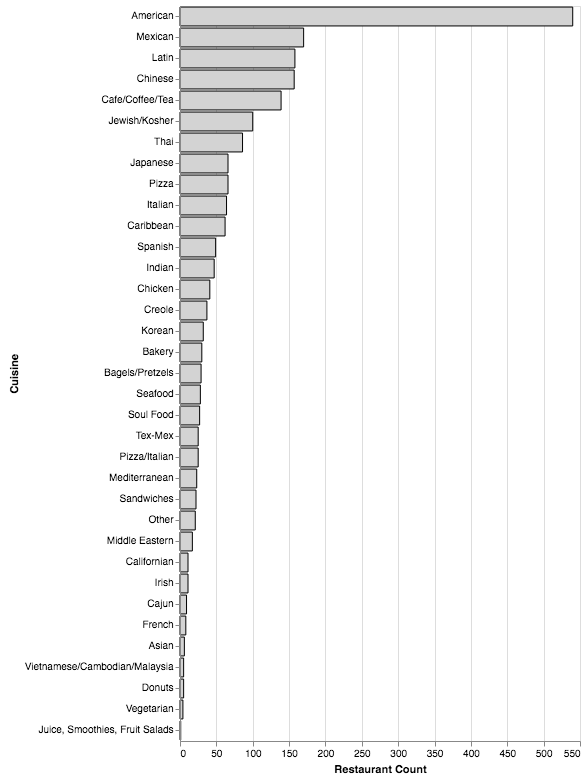

In [61]:
showCuisines(dfCuisines, 11205)